In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./iiuc_canteen/iiuc_canteen.csv")

df.loc[df[' Total Fat (g)'] == "3 2", ' Total Fat (g)'] = 3.2
df[' Total Fat (g)'] = df[' Total Fat (g)'].astype(np.float64)

perc_list = {'Vitamin A (% DV) ', 'Vitamin C (% DV)', ' Calcium (% DV) ', 'Iron (% DV) '}
for i in perc_list:
    df[i] = df[i].str.replace('%','').astype(np.float64)

In [8]:
def f(row):
    if row['Beverage_category'] == 'Tazo® Tea Drinks':
        val = 'Tea'
    elif row['Beverage_category'] == 'Smoothies':
        val = 'Smoothie'
    else:
        val = 'Caffee'
    return val

df['Type_of_product'] = df.apply(f, axis=1)


[Text(0, 0, '181'), Text(0, 0, '52'), Text(0, 0, '9')]

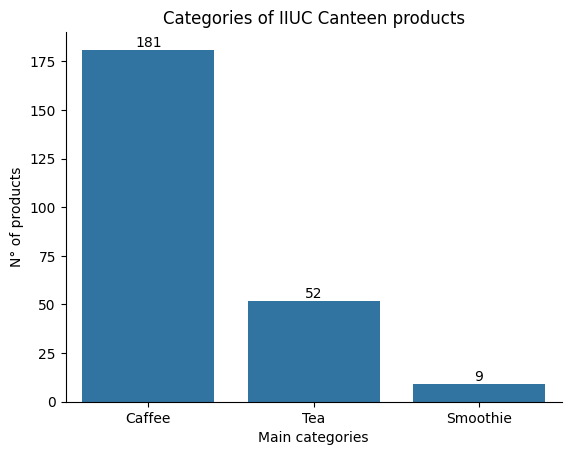

In [9]:
type_plot = sns.countplot(df, x="Type_of_product", order=df['Type_of_product'].value_counts(ascending=False).index)

type_plot.set(ylabel='N° of products', xlabel='Main categories', title = "Categories of IIUC Canteen products")
sns.despine()
type_plot.bar_label(type_plot.containers[0])

[Text(0, 0, '58'),
 Text(0, 0, '40'),
 Text(0, 0, '36'),
 Text(0, 0, '18'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '4')]

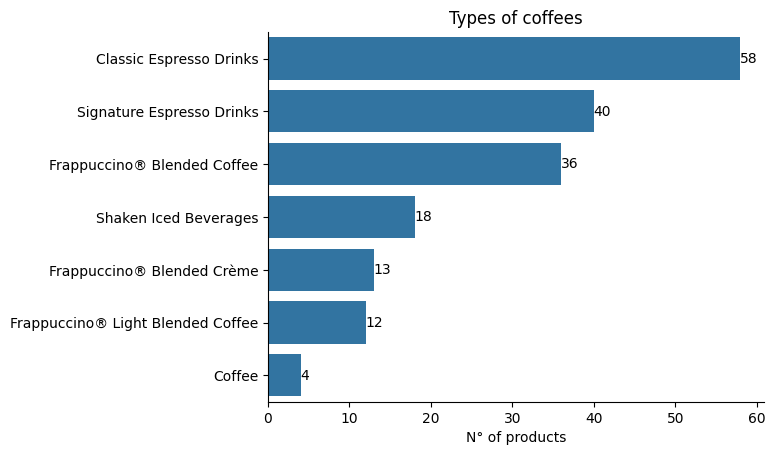

In [12]:
coffees = df[df["Type_of_product"] == "Caffee"]

coffee_plot = sns.countplot(coffees, y="Beverage_category", order=coffees['Beverage_category'].value_counts(ascending=False).index)

coffee_plot.set(xlabel='N° of products',ylabel = "", title = "Types of coffees")
sns.despine()
coffee_plot.bar_label(coffee_plot.containers[0])

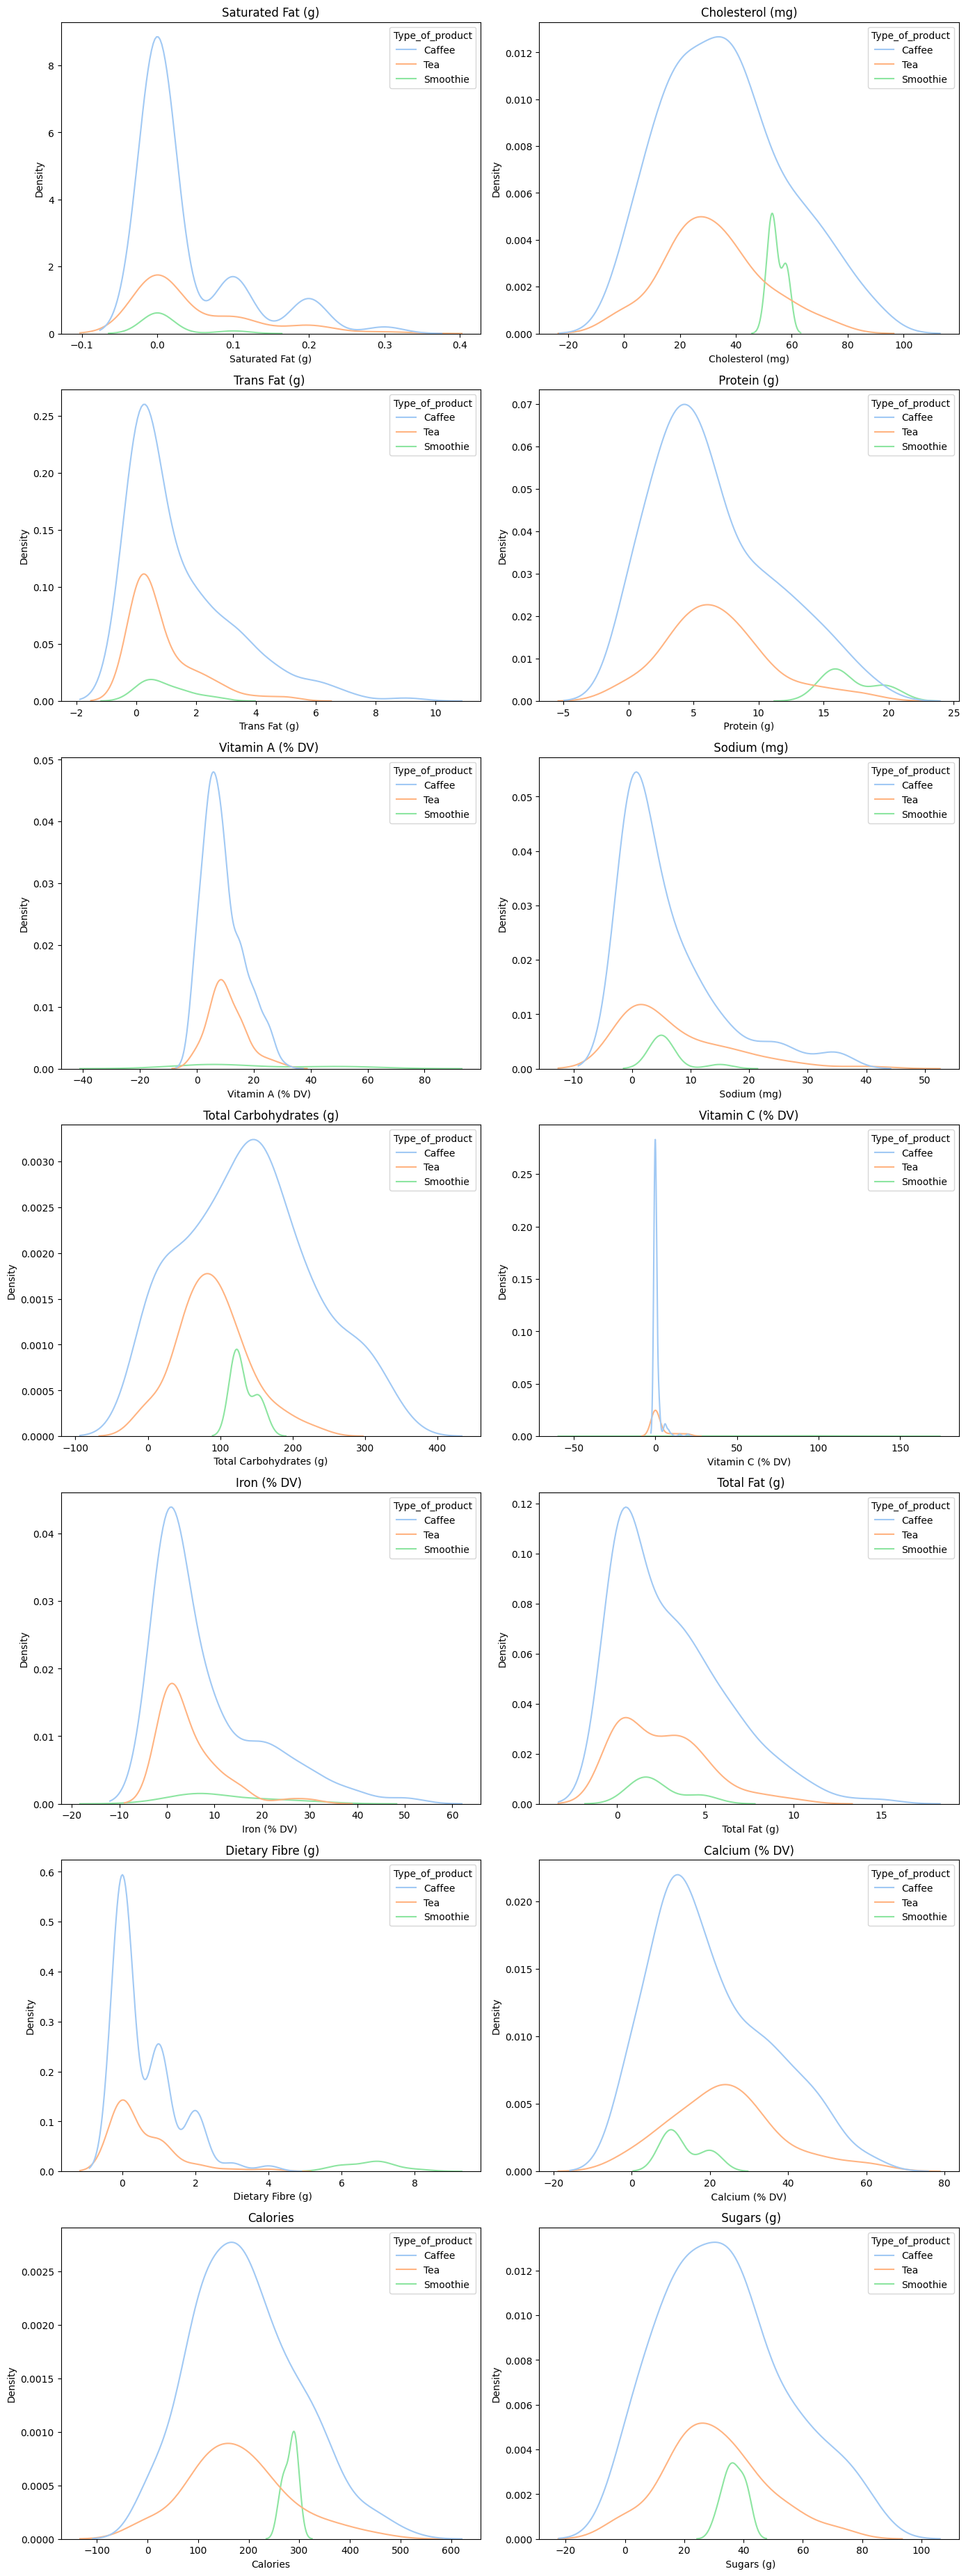

In [11]:
numerical_feature_list = {'Calories', ' Total Fat (g)', 'Trans Fat (g) ',
                          'Saturated Fat (g)', ' Sodium (mg)',
                          ' Total Carbohydrates (g) ', 'Cholesterol (mg)',
                          ' Dietary Fibre (g)', ' Sugars (g)', ' Protein (g) ',
                          'Vitamin A (% DV) ', 'Vitamin C (% DV)',
                          ' Calcium (% DV) ', 'Iron (% DV) ',}
plt.figure(figsize=(14, len(numerical_feature_list)*3))
for i , col in enumerate(numerical_feature_list):
    plt.subplot(len(numerical_feature_list)//2+1,2,i+1)
    sns.kdeplot(data=df, x=col, hue="Type_of_product", palette="pastel")
    plt.title(col)
    plt.tight_layout()